<a href="https://colab.research.google.com/github/Rasha-Abd-El-Khalik/FreeCodeCamp/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [15]:
!wget -q https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

In [17]:
categorical_features = ["sex", "smoker", "region"]
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(dataset[categorical_features])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))
df_numeric = pd.concat([dataset.drop(columns=categorical_features), encoded_df], axis=1)

train_dataset, test_dataset = train_test_split(df_numeric, test_size=0.2, random_state=42)
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


numeric_features = ['age','bmi','children']
scaler = StandardScaler()
train_dataset[numeric_features] = scaler.fit_transform(train_dataset[numeric_features])
test_dataset[numeric_features] = scaler.transform(test_dataset[numeric_features])

poly = PolynomialFeatures(degree=2, include_bias=False)
train_dataset_poly = poly.fit_transform(train_dataset)
test_dataset_poly = poly.transform(test_dataset)

In [18]:
class KerasLikeWrapper:
    def __init__(self, model, poly_transform=None):
        self.model = model
        self.poly_transform = poly_transform

    def fit(self, X, y):
        if self.poly_transform:
            X_poly = self.poly_transform.fit_transform(X)
            self.model.fit(X_poly, y)
        else:
            self.model.fit(X, y)

    def predict(self, X):
        if self.poly_transform:
            X_poly = self.poly_transform.transform(X)
            return self.model.predict(X_poly)
        return self.model.predict(X)

    def evaluate(self, X, y, verbose=0):
        preds = self.predict(X)
        mae = mean_absolute_error(y, preds)
        mse = mean_squared_error(y, preds)
        loss = mse
        return loss, mae, mse

sk_model = LinearRegression()
model = KerasLikeWrapper(sk_model, poly_transform=poly)
model.fit(train_dataset, train_labels)

Testing set Mean Abs Error: 2729.98 expenses
You passed the challenge. Great job!


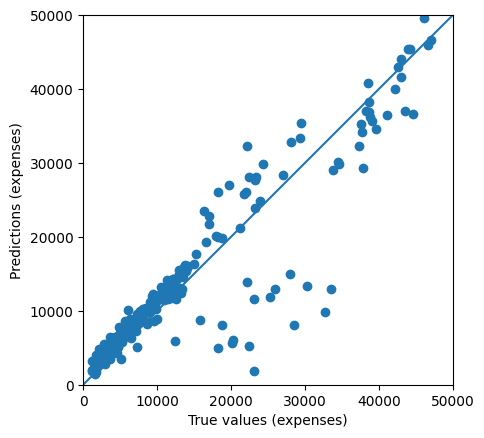

In [19]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
